In [4]:
import os

base_path = "/kaggle/input/plantvillage-tomato-leaf-dataset/plantvillage/plantvillage"

print("Dataset Base Path:", base_path)
print("\nAvailable Folders (Classes):\n")

classes = sorted(os.listdir(base_path))
for cls in classes:
    cls_path = os.path.join(base_path, cls)
    if os.path.isdir(cls_path):
        count = len(os.listdir(cls_path))
        print(f"{cls}: {count} images")

print("\nTotal Classes:", len(classes))


Dataset Base Path: /kaggle/input/plantvillage-tomato-leaf-dataset/plantvillage/plantvillage

Available Folders (Classes):

Tomato___Bacterial_spot: 1702 images
Tomato___Early_blight: 800 images
Tomato___Late_blight: 1527 images
Tomato___Leaf_Mold: 761 images
Tomato___Septoria_leaf_spot: 1417 images
Tomato___Spider_mites Two-spotted_spider_mite: 1341 images
Tomato___Target_Spot: 1123 images
Tomato___Tomato_Yellow_Leaf_Curl_Virus: 4286 images
Tomato___Tomato_mosaic_virus: 299 images
Tomato___healthy: 1273 images

Total Classes: 10


 Data preprocessing starter check
 Dataset path: /kaggle/input/plantvillage-tomato-leaf-dataset/plantvillage/plantvillage

 Dataset Structure (first-level class folders):
 - Tomato___Bacterial_spot                    1702 images
 - Tomato___Early_blight                       800 images
 - Tomato___Late_blight                       1527 images
 - Tomato___Leaf_Mold                          761 images
 - Tomato___Septoria_leaf_spot                1417 images
 - Tomato___Spider_mites Two-spotted_spider_mite   1341 images
 - Tomato___Target_Spot                       1123 images
 - Tomato___Tomato_Yellow_Leaf_Curl_Virus     4286 images
 - Tomato___Tomato_mosaic_virus                299 images
 - Tomato___healthy                           1273 images
------------------------------------------------------------
 Total images: 14529
 Total classes: 10



count
class                                               
Tomato___Bacterial_spot                         1702
Tomato___Early_blight                            800
Tomato___Late_blight                            1527
Tomato___Leaf_Mold                               761
Tomato___Septoria_leaf_spot                     1417
Tomato___Spider_mites Two-spotted_spider_mite   1341
Tomato___Target_Spot                            1123
Tomato___Tomato_Yellow_Leaf_Curl_Virus          4286
Tomato___Tomato_mosaic_virus                     299
Tomato___healthy                                1273

/tmp/ipykernel_48/335331022.py:79: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


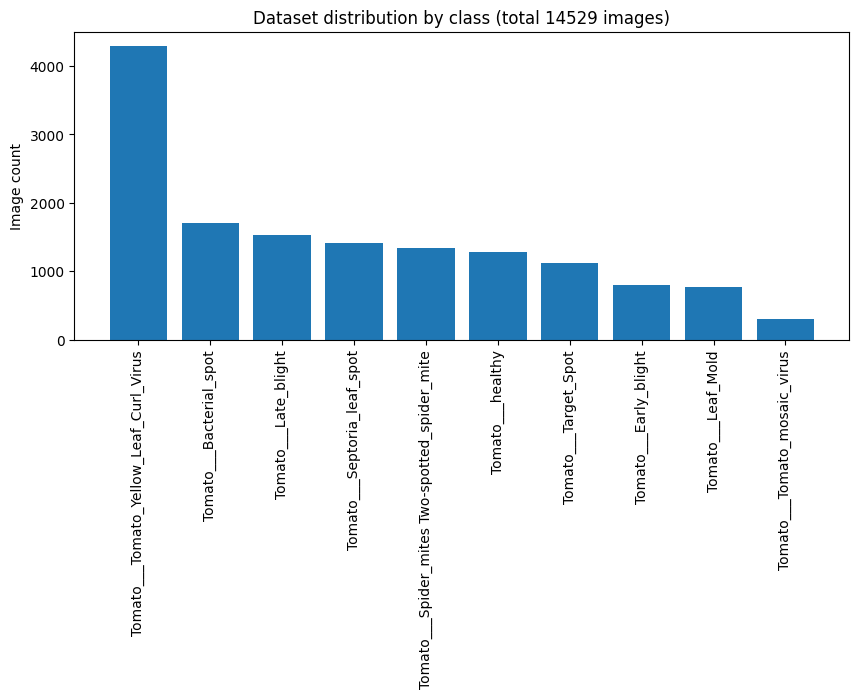


 Quick balance suggestions:
 Tomato___Bacterial_spot               1702  → ⚠ Small (consider augmentation)
 Tomato___Early_blight                  800  → ! Very small (consider augmentation)
 Tomato___Late_blight                  1527  → ⚠ Small (consider augmentation)
 Tomato___Leaf_Mold                     761  → ! Very small (consider augmentation)
 Tomato___Septoria_leaf_spot           1417  → ⚠ Small (consider augmentation)
 Tomato___Spider_mites Two-spotted_spider_mite   1341  → ⚠ Small (consider augmentation)
 Tomato___Target_Spot                  1123  → ! Very small (consider augmentation)
 Tomato___Tomato_Yellow_Leaf_Curl_Virus   4286  →  Sufficient
 Tomato___Tomato_mosaic_virus           299  → ! Very small (consider augmentation)
 Tomato___healthy                      1273  → ! Very small (consider augmentation)

 CSV and plot saved to: /kaggle/working/data/results

Next steps (I will give separate cells):
 1) Stratified Train/Val/Test split (separate cell)
 2) (Optional) 

In [21]:
# =======================================================
# Environment Dataset check + Class counts + Quick plot
# =======================================================
import os
from pathlib import Path
from collections import OrderedDict
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ========
#  CONFIG
# ========

DATASET_PATH = Path("/kaggle/input/plantvillage-tomato-leaf-dataset/plantvillage/plantvillage")
WORK_DIR = Path.cwd() / "data"          
RESULTS_DIR = WORK_DIR / "results"
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

print(" Data preprocessing starter check")
print(" Dataset path:", DATASET_PATH)
print()

# =====================
# Verify dataset exists
# =====================

if not DATASET_PATH.exists():
    raise FileNotFoundError(f"Dataset path not found: {DATASET_PATH}\nPlease add the dataset to the notebook inputs.")
# ================================
# Collect class folders and counts
# ================================

class_dirs = sorted([p for p in DATASET_PATH.iterdir() if p.is_dir()])
if not class_dirs:
    raise RuntimeError("No class directories found under dataset path. Check the folder structure.")

class_counts = OrderedDict()
total = 0
for d in class_dirs:
    cnt = sum(1 for f in d.rglob("*") if f.suffix.lower() in (".jpg", ".jpeg", ".png"))
    class_counts[d.name] = cnt
    total += cnt
    
# =============================
# Print neat ASCII tree + table
# =============================

print("============================================================")
print(" Dataset Structure (first-level class folders):")
print("============================================================")
for name, cnt in class_counts.items():
    print(f" - {name:<40} {cnt:6d} images")
print("------------------------------------------------------------")
print(f" Total images: {total}")
print(f" Total classes: {len(class_counts)}")
print("============================================================\n")

# ====================================
# Create a small pandas table and save
# ====================================

df = pd.DataFrame(list(class_counts.items()), columns=["class","count"]).set_index("class")
display(df)
df.to_csv(RESULTS_DIR / "class_counts.csv")

# ==============
# Plot bar chart
# ==============

plt.figure(figsize=(10,4))
names = list(class_counts.keys())
counts = list(class_counts.values())
order = np.argsort(counts)[::-1]  # descending
plt.bar(np.array(names)[order], np.array(counts)[order])
plt.xticks(rotation=90)
plt.ylabel("Image count")
plt.title(f"Dataset distribution by class (total {total} images)")
plt.tight_layout()
plt.savefig(RESULTS_DIR / "class_distribution_bar.png", dpi=150, bbox_inches='tight')
plt.show()

# =========================
# Quick balance suggestions
# =========================


max_c = max(counts)
min_c = min(counts)
print("\n Quick balance suggestions:")
for name, cnt in class_counts.items():
    ratio = cnt / max_c
    if ratio < 0.3:
        status = "! Very small (consider augmentation)"
    elif ratio < 0.6:
        status = "⚠ Small (consider augmentation)"
    else:
        status = " Sufficient"
    print(f" {name:<35} {cnt:6d}  → {status}")

print("\n CSV and plot saved to:", RESULTS_DIR)
print("\nNext steps (I will give separate cells):")
print(" 1) Stratified Train/Val/Test split (separate cell)")
print(" 2) (Optional) Remove corrupted images (separate cell)")
print(" 3) Build tf.data pipelines (resize + preprocess) (separate cell)")
print(" 4) Augmentation pipeline preview (separate cell)")
print(" 5) Compute class weights (separate cell)")
print(" 6) Model build (EfficientNetB0) (separate cell)")


In [23]:
# ===============================================================
# Train / Val / Test Split (70% / 15% / 15%)
# ===============================================================

import os
import shutil
from pathlib import Path
from sklearn.model_selection import train_test_split
import pandas as pd

# ======
# CONFIG
# ======

DATASET_PATH = Path("/kaggle/input/plantvillage-tomato-leaf-dataset/plantvillage/plantvillage")
OUT_DIR = Path.cwd() / "data"
TRAIN_RATIO = 0.70
VAL_RATIO   = 0.15
TEST_RATIO  = 0.15
SEED = 42

# ===============
# Prepare folders
# ===============

for split in ["train", "val", "test"]:
    (OUT_DIR / split).mkdir(parents=True, exist_ok=True)

print(" Output folders created:")
print(OUT_DIR / "train")
print(OUT_DIR / "val")
print(OUT_DIR / "test")

# ==========================
# Load image paths per class
# ==========================

class_dirs = sorted([d for d in DATASET_PATH.iterdir() if d.is_dir()])
data_items = [] 

for cls in class_dirs:
    images = [f for f in cls.glob("*") if f.suffix.lower() in [".jpg", ".jpeg", ".png"]]
    for img in images:
        data_items.append((img, cls.name))

print(f"\nTotal images found: {len(data_items)}")
print(f"Total classes: {len(class_dirs)}")

# ====================
# Convert to DataFrame
# ====================

df = pd.DataFrame(data_items, columns=["filepath", "class"])
df["filepath"] = df["filepath"].astype(str)

# ========================
# Perform STRATIFIED Split
# ========================

train_df, temp_df = train_test_split(
    df, test_size=(1 - TRAIN_RATIO), random_state=SEED, stratify=df["class"]
)

val_df, test_df = train_test_split(
    temp_df,
    test_size=TEST_RATIO / (TEST_RATIO + VAL_RATIO),
    random_state=SEED,
    stratify=temp_df["class"]
)

print("\n Split Summary:")
print(" Train samples: ", len(train_df))
print(" Val samples:   ", len(val_df))
print(" Test samples:  ", len(test_df))

# ==========
# COPY FILES
# ==========

def copy_files(df, split_name):
    for _, row in df.iterrows():
        src = Path(row["filepath"])
        cls_name = row["class"]
        dst_dir = OUT_DIR / split_name / cls_name
        dst_dir.mkdir(parents=True, exist_ok=True)
        dst = dst_dir / src.name
        shutil.copy2(src, dst)

print("\n Copying Train files...")
copy_files(train_df, "train")

print(" Copying Val files...")
copy_files(val_df, "val")

print(" Copying Test files...")
copy_files(test_df, "test")

print("\n Stratified Split Completed!")

# =============
# Summary Table
# =============

summary = []
for cls in sorted(df["class"].unique()):
    summary.append([
        cls,
        (train_df["class"] == cls).sum(),
        (val_df["class"] == cls).sum(),
        (test_df["class"] == cls).sum()
    ])

summary_df = pd.DataFrame(summary, columns=["Class", "Train", "Val", "Test"])
display(summary_df)

print("\n Next Step: Preprocessing (resize + normalize) → tf.data")
print("Tell me: 'Give preprocessing cell'")


 Output folders created:
/kaggle/working/data/train
/kaggle/working/data/val
/kaggle/working/data/test

Total images found: 14529
Total classes: 10

 Split Summary:
 Train samples:  10170
 Val samples:    2179
 Test samples:   2180

 Copying Train files...
 Copying Val files...
 Copying Test files...

 Stratified Split Completed!


Class  Train  Val  Test
0                        Tomato___Bacterial_spot   1191  255   256
1                          Tomato___Early_blight    560  120   120
2                           Tomato___Late_blight   1069  229   229
3                             Tomato___Leaf_Mold    533  114   114
4                    Tomato___Septoria_leaf_spot    992  212   213
5  Tomato___Spider_mites Two-spotted_spider_mite    939  201   201
6                           Tomato___Target_Spot    786  169   168
7         Tomato___Tomato_Yellow_Leaf_Curl_Virus   3000  643   643
8                   Tomato___Tomato_mosaic_virus    209   45    45
9                               Tomato___healthy    891  191   191


 Next Step: Preprocessing (resize + normalize) → tf.data
Tell me: 'Give preprocessing cell'


In [24]:
# ============================================================
# Preprocessing → resize + normalize → tf.data
# ============================================================

import tensorflow as tf
from pathlib import Path

# =======
# CONFIG
# =======

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

TRAIN_DIR = Path("data/train")
VAL_DIR   = Path("data/val")
TEST_DIR  = Path("data/test")

print(" Preprocessing started...")
print(" Image size:", IMG_SIZE)
print(" Batch size:", BATCH_SIZE)

# ==========================
# EfficientNet Preprocessing
# Converts uint8 → float32 → normalized [-1, +1]
# ===============================================

preprocess_input = tf.keras.applications.efficientnet.preprocess_input

# ===============================
# Load datasets raw resized uint8
# ===============================

train_raw = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN_DIR,
    image_size=IMG_SIZE,
    label_mode="int",
    shuffle=True,
    batch_size=None,     
    seed=42
)

val_raw = tf.keras.preprocessing.image_dataset_from_directory(
    VAL_DIR,
    image_size=IMG_SIZE,
    label_mode="int",
    shuffle=False,
    batch_size=None
)

test_raw = tf.keras.preprocessing.image_dataset_from_directory(
    TEST_DIR,
    image_size=IMG_SIZE,
    label_mode="int",
    shuffle=False,
    batch_size=None
)

print("\n Raw datasets loaded (unbatched).")

# ====================================
# Convert  normalized, batched tf.data
# ====================================

def prepare_dataset(ds, shuffle=False):
    ds = ds.map(lambda x, y: (preprocess_input(tf.cast(x, tf.float32)), y),
                num_parallel_calls=AUTOTUNE)

    if shuffle:
        ds = ds.shuffle(1000)
    
    ds = ds.batch(BATCH_SIZE).prefetch(AUTOTUNE)
    return ds

train_ds = prepare_dataset(train_raw, shuffle=True)
val_ds   = prepare_dataset(val_raw, shuffle=False)
test_ds  = prepare_dataset(test_raw, shuffle=False)

print("\n Preprocessing complete!")
print("Created: train_ds, val_ds, test_ds\n")

# -------- Check a sample batch --------
for images, labels in train_ds.take(1):
    print(" Batch images shape:", images.shape)
    print(" Batch labels shape:", labels.shape)
    print(" Image pixel range after preprocess_input = [-1, +1]")
    break

print("\nReady for: Augmentation + Model Building")


 Preprocessing started...
 Image size: (224, 224)
 Batch size: 32
Found 14257 files belonging to 10 classes.
Found 5069 files belonging to 10 classes.
Found 5037 files belonging to 10 classes.

 Raw datasets loaded (unbatched).

 Preprocessing complete!
Created: train_ds, val_ds, test_ds

 Batch images shape: (32, 224, 224, 3)
 Batch labels shape: (32,)
 Image pixel range after preprocess_input = [-1, +1]

Ready for: Augmentation + Model Building


✔ SAFE augmentation layer created.

✔ aug_train_ds READY (safe augmentation)



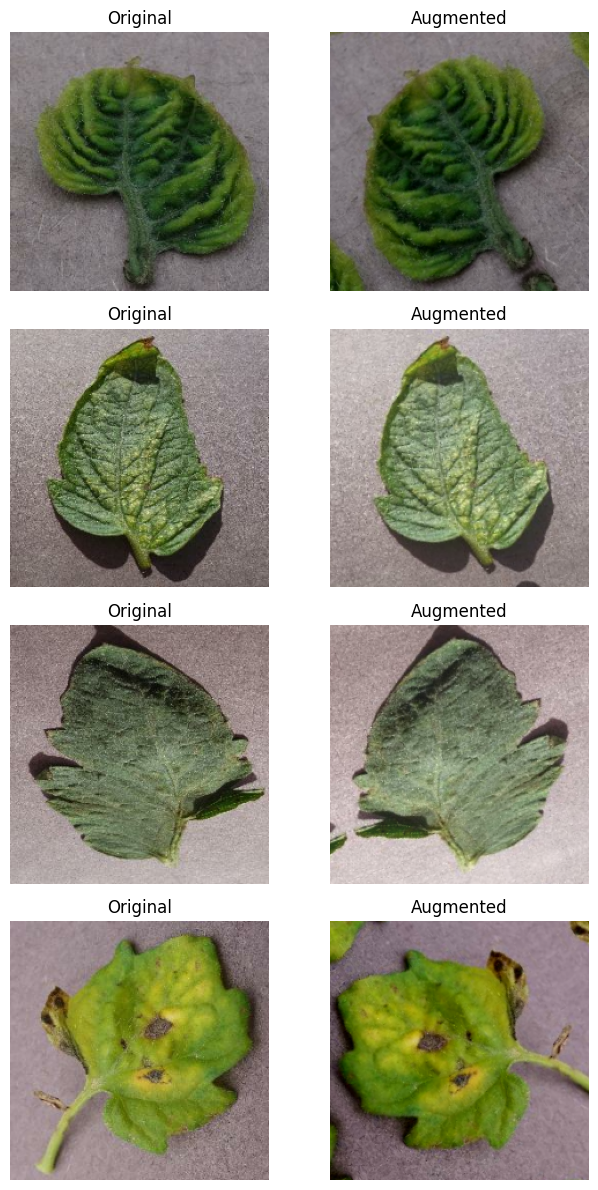

Preview done.


In [33]:
# ============================================================
# SAFE AUGMENTATION (for EfficientNet) + CREATE 
# ============================================================

import tensorflow as tf
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE
RESULTS_DIR = Path("data/results")
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

# -------- FIXED SAFE AUGMENTATION --------
# (no translation, no zoom — shape remains stable)
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.10),
    tf.keras.layers.RandomContrast(0.15),
    tf.keras.layers.RandomBrightness(0.15),
], name="safe_aug")

print("✔ SAFE augmentation layer created.\n")

preprocess_input = tf.keras.applications.efficientnet.preprocess_input

def augment_and_preprocess(img, label):
    img = tf.cast(img, tf.float32)
    img = data_augmentation(img, training=True)   # SAFE augment
    img = preprocess_input(img)                   # normalize
    return img, label

aug_train_ds = (
    train_raw
    .map(augment_and_preprocess, num_parallel_calls=AUTOTUNE)
    .shuffle(1000)
    .batch(BATCH_SIZE)
    .prefetch(AUTOTUNE)
)

print("✔ aug_train_ds READY (safe augmentation)\n")

# -------- SIMPLE PREVIEW --------
N = 4
raw_list, aug_list = [], []

for img, lb in train_raw.take(N):
    raw = img.numpy().astype(np.uint8)
    aug = data_augmentation(tf.cast(raw, tf.float32), training=True).numpy()
    aug = np.clip(aug, 0, 255).astype(np.uint8)
    raw_list.append(raw)
    aug_list.append(aug)

fig, axes = plt.subplots(N, 2, figsize=(7, 3*N))
for i in range(N):
    axes[i,0].imshow(raw_list[i]); axes[i,0].axis("off"); axes[i,0].set_title("Original")
    axes[i,1].imshow(aug_list[i]); axes[i,1].axis("off"); axes[i,1].set_title("Augmented")
plt.tight_layout()
plt.show()

print("Preview done.")


In [35]:
# -----------------------------
# Cell: Diagnostic — check dataset / batch shapes
# -----------------------------
import tensorflow as tf
import numpy as np
from pprint import pprint

print("OBJECTS IN ENVIRONMENT:")
for name in ["train_raw","aug_train_ds","train_ds","val_ds","test_ds","model"]:
    print(f" - {name}: {'FOUND' if name in globals() else 'MISSING'}")

print("\n--- element_spec (if dataset exists) ---")
for ds_name in ["train_raw","aug_train_ds","train_ds","val_ds","test_ds"]:
    if ds_name in globals():
        ds = globals()[ds_name]
        try:
            print(f"\n{ds_name}.element_spec:")
            pprint(ds.element_spec)
        except Exception as e:
            print(f"{ds_name} element_spec error:", e)

# Take one batch from each dataset and print shapes/dtypes
def inspect_one_batch(ds, name, n=1):
    try:
        it = iter(ds)
        batch = next(it)
    except Exception as e:
        print(f"\nCould not get batch from {name}: {e}")
        return
    # batch can be (images, labels) or images only
    if isinstance(batch, tuple) or isinstance(batch, list):
        x, y = batch[0], batch[1]
        print(f"\n{name} -> x.shape: {getattr(x,'shape', None)}, x.dtype: {getattr(x,'dtype', None)}")
        print(f"{name} -> y.shape: {getattr(y,'shape', None)}, y.dtype: {getattr(y,'dtype', None)}")
        # print a small sample of label values
        try:
            y_np = y.numpy()
            print(f"{name} -> labels sample (first 8): {np.array(y_np).ravel()[:8]}")
        except Exception as _:
            print(f"{name} -> labels (cannot convert to numpy)")
    else:
        print(f"\n{name} yields single element of type {type(batch)} : {batch}")

# Inspect augmentation dataset and val
for ds_name in ["aug_train_ds","train_raw","train_ds","val_ds","test_ds"]:
    if ds_name in globals():
        inspect_one_batch(globals()[ds_name], ds_name)

# Also check model output shape / loss config
if "model" in globals():
    print("\n--- Model summary / loss info ---")
    try:
        model.summary()
    except Exception as e:
        print("model.summary() error:", e)
    try:
        print("model.loss:", model.loss)
    except Exception as e:
        print("Could not read model.loss:", e)

print("\nDiagnostic cell finished. Copy the full printed output and paste here.")


OBJECTS IN ENVIRONMENT:
 - train_raw: FOUND
 - aug_train_ds: FOUND
 - train_ds: FOUND
 - val_ds: FOUND
 - test_ds: FOUND
 - model: FOUND

--- element_spec (if dataset exists) ---

train_raw.element_spec:
(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(), dtype=tf.int32, name=None))

aug_train_ds.element_spec:
(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

train_ds.element_spec:
(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

val_ds.element_spec:
(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

test_ds.element_spec:
(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

aug_train_ds -> x.shape: (32, 224, 224, 3), x.dtype: <dtype: 'float32'>
aug_train_ds -> y

Model: "EfficientNetB0_TL"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_image         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_image[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,088,003 (15.59 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

 Optimizer params: 25,622 (100.09 KB)

model.loss: <LossFunctionWrapper(<function sparse_categorical_crossentropy at 0x78d2ca1c7060>, kwargs={'from_logits': False, 'ignore_class': None})>

Diagnostic cell finished. Copy the full printed output and paste here.


In [29]:
# =================================================
# Compute class weights (balanced) and save results
# =================================================

import os
import json
from pathlib import Path
from collections import Counter
import numpy as np
import pandas as pd
from sklearn.utils.class_weight import compute_class_weight

# ======
# Paths
# ======

TRAIN_DIR = Path("data/train")
RESULTS_DIR = Path("data/results")
RESULTS_DIR.mkdir(parents=True, exist_ok=True)


labels = []
class_names = None

try:
   
    train_raw  
  
    for _, lb in train_raw:
        labels.append(int(lb.numpy()))
 
    try:
        class_names = train_raw.class_names
    except Exception:
        class_names = None
    source = "train_raw (tf.data)"
except NameError:
  
    if not TRAIN_DIR.exists():
        raise RuntimeError(f"Neither train_raw found nor {TRAIN_DIR} exists. Run split/preprocess first.")
    class_dirs = sorted([d for d in TRAIN_DIR.iterdir() if d.is_dir()])
    
    # build mapping from class name -> index (alphabetical to be deterministic)
    
    class_names = [d.name for d in class_dirs]
    name_to_idx = {n:i for i,n in enumerate(class_names)}
    for d in class_dirs:
        idx = name_to_idx[d.name]
        
        # count files
        
        for f in d.glob("*"):
            if f.suffix.lower() in (".jpg",".jpeg",".png"):
                labels.append(idx)
    source = str(TRAIN_DIR)

labels = np.array(labels)
unique_labels = np.unique(labels)
counts = Counter(labels)

# compute class weights using sklearn (balanced)

class_weights_values = compute_class_weight(class_weight="balanced",
                                            classes=unique_labels,
                                            y=labels)

# build mapping: index -> weight, and include class name if available

class_weights = {}
rows = []
for idx, w in zip(unique_labels, class_weights_values):
    name = class_names[int(idx)] if class_names is not None and int(idx) < len(class_names) else str(int(idx))
    class_weights[int(idx)] = float(w)
    rows.append({"class_index": int(idx), "class_name": name, "count": int(counts[int(idx)]), "weight": float(w)})

# Save to CSV and JSON

df = pd.DataFrame(rows).sort_values("class_index").reset_index(drop=True)
csv_path = RESULTS_DIR / "class_weights_table.csv"
json_path = RESULTS_DIR / "class_weights.json"
df.to_csv(csv_path, index=False)
with open(json_path, "w") as fh:
    json.dump(class_weights, fh, indent=2)

# Print summary

print("Source for labels:", source)
print("\nClass weights (use this dict in model.fit):\n")
print(class_weights)
print("\nDetailed table:")
display(df)

print(f"\nSaved CSV -> {csv_path}")
print(f"Saved JSON -> {json_path}")


Source for labels: train_raw (tf.data)

Class weights (use this dict in model.fit):

{0: 0.8537125748502994, 1: 1.8161783439490446, 2: 0.9504666666666667, 3: 1.8933598937583, 4: 1.0279019466474406, 5: 1.0891520244461421, 6: 1.2937386569872957, 7: 0.338646080760095, 8: 4.849319727891157, 9: 1.1433039294306335}

Detailed table:


class_index                                     class_name  count    weight
0            0                        Tomato___Bacterial_spot   1670  0.853713
1            1                          Tomato___Early_blight    785  1.816178
2            2                           Tomato___Late_blight   1500  0.950467
3            3                             Tomato___Leaf_Mold    753  1.893360
4            4                    Tomato___Septoria_leaf_spot   1387  1.027902
5            5  Tomato___Spider_mites Two-spotted_spider_mite   1309  1.089152
6            6                           Tomato___Target_Spot   1102  1.293739
7            7         Tomato___Tomato_Yellow_Leaf_Curl_Virus   4210  0.338646
8            8                   Tomato___Tomato_mosaic_virus    294  4.849320
9            9                               Tomato___healthy   1247  1.143304


Saved CSV -> data/results/class_weights_table.csv
Saved JSON -> data/results/class_weights.json


In [30]:
# ============================================================
# Build & compile EfficientNetB0 model  
# ============================================================

import tensorflow as tf
from pathlib import Path
import numpy as np

# ===============
# reproducibility
# ===============

SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)

# =======
# CONFIG
# =======

IMG_SIZE = (224, 224, 3)
NUM_CLASSES = None   
BASE_LR = 1e-4
DROPOUT_RATE = 0.4
MODEL_DIR = Path("models")
MODEL_DIR.mkdir(parents=True, exist_ok=True)
BEST_MODEL_PATH = MODEL_DIR / "effnetb0_best.h5"

# ---------- infer number of classes ----------
 
try:
    class_names = train_raw.class_names
    NUM_CLASSES = len(class_names)
    print("Using class names from train_raw.")
except Exception:
    import os
    train_dir = Path("data/train")
    class_names = sorted([d.name for d in train_dir.iterdir() if d.is_dir()])
    NUM_CLASSES = len(class_names)
    print("Using class folder names from data/train.")

print(f"Detected {NUM_CLASSES} classes: {class_names}")

# ---------- Build model ----------
 
inputs = tf.keras.Input(shape=IMG_SIZE, name="input_image")

 
# Load EfficientNetB0 base (imagenet weights)
base_model = tf.keras.applications.EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_tensor=inputs,
    pooling="avg"
)
base_model.trainable = False   

x = base_model.output
x = tf.keras.layers.Dropout(DROPOUT_RATE, name="head_dropout")(x)
outputs = tf.keras.layers.Dense(NUM_CLASSES, activation="softmax", name="predictions")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs, name="EfficientNetB0_TL")

# ---------- Compile ----------
optimizer = tf.keras.optimizers.Adam(learning_rate=BASE_LR)
loss = tf.keras.losses.SparseCategoricalCrossentropy()   
metrics = [
    tf.keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
    tf.keras.metrics.Precision(name="precision"),
    tf.keras.metrics.Recall(name="recall")
]

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# ---------- Callbacks ----------
callbacks = []

# Save best model by validation accuracy
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    filepath=str(BEST_MODEL_PATH),
    monitor="val_accuracy",
    mode="max",
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)
callbacks.append(checkpoint_cb)

# Reduce LR on plateau
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=3,
    verbose=1,
    min_lr=1e-7
)
callbacks.append(reduce_lr)

# Early stopping
earlystop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=8,
    restore_best_weights=True,
    verbose=1
)
callbacks.append(earlystop)

# ---------- Summary ----------
print("\nModel built and compiled.")
model.summary()

print("\nCallbacks:")
for cb in callbacks:
    print(" -", cb.__class__.__name__)

print(f"\nBest model will be saved to: {BEST_MODEL_PATH}")
print("\nREADY: Use `model.fit(aug_train_ds, validation_data=val_ds, epochs=..., class_weight=class_weights, callbacks=callbacks)`")


Using class names from train_raw.
Detected 10 classes: ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Model built and compiled.


Model: "EfficientNetB0_TL"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_image         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_image[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,062,381 (15.50 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 4,049,571 (15.45 MB)


Callbacks:
 - ModelCheckpoint
 - ReduceLROnPlateau
 - EarlyStopping

Best model will be saved to: models/effnetb0_best.h5

READY: Use `model.fit(aug_train_ds, validation_data=val_ds, epochs=..., class_weight=class_weights, callbacks=callbacks)`


In [36]:
# ============================================================
# Callbacks (ModelCheckpoint, ReduceLR, EarlyStop)
# ============================================================

import tensorflow as tf
from pathlib import Path

# save directory
MODEL_DIR = Path("models")
MODEL_DIR.mkdir(parents=True, exist_ok=True)

BEST_MODEL_PATH = MODEL_DIR / "effnetb0_best.h5"

# --- Callback 1: Save BEST model only ---
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    filepath=str(BEST_MODEL_PATH),
    monitor="val_accuracy",
    mode="max",
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)

# --- Callback 2: Reduce LR on Plateau ---
reduce_lr_cb = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=3,
    verbose=1,
    min_lr=1e-7
)

# --- Callback 3: Early Stopping ---
earlystop_cb = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=8,
    verbose=1,
    restore_best_weights=True
)

# Combine all
callbacks = [checkpoint_cb, reduce_lr_cb, earlystop_cb]

print(" Callbacks created:")
for cb in callbacks:
    print(" -", cb.__class__.__name__)

print("\nBest model will be saved to:", BEST_MODEL_PATH)
print("\nUse these callbacks in model.fit(..., callbacks=callbacks)")


 Callbacks created:
 - ModelCheckpoint
 - ReduceLROnPlateau
 - EarlyStopping

Best model will be saved to: models/effnetb0_best.h5

Use these callbacks in model.fit(..., callbacks=callbacks)


In [37]:
# ===== SAFE TRAIN CELL (replace your current train cell with this) =====
import tensorflow as tf
from pathlib import Path
AUTOTUNE = tf.data.AUTOTUNE
IMG_SIZE = (224,224)
BATCH_SIZE = 32

# --- safe augmentation (works on batched tensors) ---
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.10),
    tf.keras.layers.RandomContrast(0.15),
    tf.keras.layers.RandomBrightness(0.10),
], name="safe_aug")

preprocess_input = tf.keras.applications.efficientnet.preprocess_input

def augment_and_preprocess(image, label):
    # image: float32 in [0, 255] or already float32; keep dtype consistent
    image = tf.cast(image, tf.float32)
    # apply augmentation (training only)
    image = data_augmentation(image, training=True)
    # apply model preprocess_input (scales to -1..+1 for EfficientNet)
    image = preprocess_input(image)
    return image, label

# --- Build augmented training dataset from existing batched train_ds ---
# IMPORTANT: use the batched train_ds that yields (batch, labels)
# If you only have unbatched train_raw, first batch it: train_raw.batch(BATCH_SIZE)
# Here we assume train_ds is already batched (from your diagnostic it is).
aug_train_ds = train_ds.map(augment_and_preprocess, num_parallel_calls=AUTOTUNE)
aug_train_ds = aug_train_ds.prefetch(AUTOTUNE)

# quick check
print("aug_train_ds.element_spec:", aug_train_ds.element_spec)
for x,y in aug_train_ds.take(1):
    print("batch x shape, dtype:", x.shape, x.dtype)
    print("batch y shape, dtype:", y.shape, y.dtype)
    break

# --- compile model (if not compiled already) ---
# Use sparse_categorical_crossentropy for integer labels (your model used that already)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["sparse_categorical_accuracy"],
    run_eagerly=True  # <-- set True to get readable errors; turn False after debug
)

# callbacks (you already created these earlier; if not, create simple ones)
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
callbacks = [
    ModelCheckpoint("models/effnetb0_best.h5", monitor="val_loss", save_best_only=True),
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-7),
    EarlyStopping(monitor="val_loss", patience=6, restore_best_weights=True),
]

# finally fit (use your class_weights dict if available)
history = model.fit(
    aug_train_ds,
    validation_data=val_ds,
    epochs=10,               # start small for testing
    callbacks=callbacks,
    class_weight=class_weights  # if you have it, otherwise remove
)


aug_train_ds.element_spec: (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
batch x shape, dtype: (32, 224, 224, 3) <dtype: 'float32'>
batch y shape, dtype: (32,) <dtype: 'int32'>
Epoch 1/10


I0000 00:00:1763227997.757739      48 cuda_dnn.cc:529] Loaded cuDNN version 90300


446/446 ━━━━━━━━━━━━━━━━━━━━ 0s 669ms/step - loss: 2.2022 - sparse_categorical_accuracy: 0.2386

446/446 ━━━━━━━━━━━━━━━━━━━━ 344s 765ms/step - loss: 2.2017 - sparse_categorical_accuracy: 0.2389 - val_loss: 1.5013 - val_sparse_categorical_accuracy: 0.6717 - learning_rate: 1.0000e-04
Epoch 2/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 0s 667ms/step - loss: 1.5842 - sparse_categorical_accuracy: 0.5981

446/446 ━━━━━━━━━━━━━━━━━━━━ 342s 763ms/step - loss: 1.5840 - sparse_categorical_accuracy: 0.5981 - val_loss: 1.1594 - val_sparse_categorical_accuracy: 0.7477 - learning_rate: 1.0000e-04
Epoch 3/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 0s 668ms/step - loss: 1.2803 - sparse_categorical_accuracy: 0.6954

446/446 ━━━━━━━━━━━━━━━━━━━━ 341s 762ms/step - loss: 1.2802 - sparse_categorical_accuracy: 0.6955 - val_loss: 0.9763 - val_sparse_categorical_accuracy: 0.7789 - learning_rate: 1.0000e-04
Epoch 4/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 0s 668ms/step - loss: 1.1191 - sparse_categorical_accuracy: 0.7385

446/446 ━━━━━━━━━━━━━━━━━━━━ 342s 763ms/step - loss: 1.1190 - sparse_categorical_accuracy: 0.7385 - val_loss: 0.8446 - val_sparse_categorical_accuracy: 0.8037 - learning_rate: 1.0000e-04
Epoch 5/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 0s 668ms/step - loss: 1.0005 - sparse_categorical_accuracy: 0.7612

446/446 ━━━━━━━━━━━━━━━━━━━━ 342s 763ms/step - loss: 1.0005 - sparse_categorical_accuracy: 0.7612 - val_loss: 0.7680 - val_sparse_categorical_accuracy: 0.8163 - learning_rate: 1.0000e-04
Epoch 6/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 0s 670ms/step - loss: 0.8873 - sparse_categorical_accuracy: 0.7883

446/446 ━━━━━━━━━━━━━━━━━━━━ 343s 766ms/step - loss: 0.8873 - sparse_categorical_accuracy: 0.7883 - val_loss: 0.6972 - val_sparse_categorical_accuracy: 0.8321 - learning_rate: 1.0000e-04
Epoch 7/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 0s 670ms/step - loss: 0.8335 - sparse_categorical_accuracy: 0.7987

446/446 ━━━━━━━━━━━━━━━━━━━━ 343s 765ms/step - loss: 0.8335 - sparse_categorical_accuracy: 0.7987 - val_loss: 0.6408 - val_sparse_categorical_accuracy: 0.8442 - learning_rate: 1.0000e-04
Epoch 8/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 0s 669ms/step - loss: 0.7776 - sparse_categorical_accuracy: 0.8082

446/446 ━━━━━━━━━━━━━━━━━━━━ 342s 765ms/step - loss: 0.7776 - sparse_categorical_accuracy: 0.8082 - val_loss: 0.6020 - val_sparse_categorical_accuracy: 0.8534 - learning_rate: 1.0000e-04
Epoch 9/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 0s 676ms/step - loss: 0.7378 - sparse_categorical_accuracy: 0.8264

446/446 ━━━━━━━━━━━━━━━━━━━━ 346s 772ms/step - loss: 0.7378 - sparse_categorical_accuracy: 0.8264 - val_loss: 0.5598 - val_sparse_categorical_accuracy: 0.8619 - learning_rate: 1.0000e-04
Epoch 10/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 0s 671ms/step - loss: 0.7032 - sparse_categorical_accuracy: 0.8248

446/446 ━━━━━━━━━━━━━━━━━━━━ 344s 768ms/step - loss: 0.7032 - sparse_categorical_accuracy: 0.8248 - val_loss: 0.5368 - val_sparse_categorical_accuracy: 0.8647 - learning_rate: 1.0000e-04


Model summary before fine-tune (trainable counts):
 - currently trainable layers: 2 / 241
After unfreeze: trainable layers count: 40
Epoch 1/8


E0000 00:00:1763231925.102812     130 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1763231925.244331     130 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


  3/446 ━━━━━━━━━━━━━━━━━━━━ 25s 57ms/step - accuracy: 0.8507 - loss: 0.6977 

I0000 00:00:1763231932.743325     130 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


444/446 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.8471 - loss: 0.5777

E0000 00:00:1763231980.929166     128 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1763231981.070724     128 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


446/446 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.8472 - loss: 0.5775

446/446 ━━━━━━━━━━━━━━━━━━━━ 100s 163ms/step - accuracy: 0.8472 - loss: 0.5774 - val_accuracy: 0.9065 - val_loss: 0.3093 - learning_rate: 1.0000e-05
Epoch 2/8
446/446 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.8751 - loss: 0.4359

446/446 ━━━━━━━━━━━━━━━━━━━━ 51s 112ms/step - accuracy: 0.8751 - loss: 0.4359 - val_accuracy: 0.9217 - val_loss: 0.2516 - learning_rate: 1.0000e-05
Epoch 3/8
445/446 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.8911 - loss: 0.3697

446/446 ━━━━━━━━━━━━━━━━━━━━ 51s 113ms/step - accuracy: 0.8911 - loss: 0.3697 - val_accuracy: 0.9369 - val_loss: 0.2078 - learning_rate: 1.0000e-05
Epoch 4/8
445/446 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9108 - loss: 0.3132

446/446 ━━━━━━━━━━━━━━━━━━━━ 51s 113ms/step - accuracy: 0.9108 - loss: 0.3132 - val_accuracy: 0.9422 - val_loss: 0.1808 - learning_rate: 1.0000e-05
Epoch 5/8
446/446 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.9202 - loss: 0.2822

446/446 ━━━━━━━━━━━━━━━━━━━━ 51s 113ms/step - accuracy: 0.9202 - loss: 0.2822 - val_accuracy: 0.9440 - val_loss: 0.1681 - learning_rate: 1.0000e-05
Epoch 6/8
445/446 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.9225 - loss: 0.2613

446/446 ━━━━━━━━━━━━━━━━━━━━ 51s 112ms/step - accuracy: 0.9225 - loss: 0.2613 - val_accuracy: 0.9485 - val_loss: 0.1508 - learning_rate: 1.0000e-05
Epoch 7/8
446/446 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.9316 - loss: 0.2351

446/446 ━━━━━━━━━━━━━━━━━━━━ 51s 112ms/step - accuracy: 0.9316 - loss: 0.2350 - val_accuracy: 0.9588 - val_loss: 0.1280 - learning_rate: 1.0000e-05
Epoch 8/8
446/446 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9356 - loss: 0.2103

446/446 ━━━━━━━━━━━━━━━━━━━━ 51s 113ms/step - accuracy: 0.9356 - loss: 0.2103 - val_accuracy: 0.9633 - val_loss: 0.1128 - learning_rate: 1.0000e-05


Fine-tune time: 457.7 s
Saved finetuned model -> models/effnetb0_finetuned.h5

Evaluating on test set...
158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.9548 - loss: 0.1461
loss: 0.1173
compile_metrics: 0.9629

Classification report:
              precision    recall  f1-score   support

           0     0.9670    0.9620    0.9645       579
           1     0.9407    0.8912    0.9153       285
           2     0.9589    0.9753    0.9670       526
           3     0.9845    0.9621    0.9732       264
           4     0.9596    0.9185    0.9386       491
           5     0.9477    0.9539    0.9508       456
           6     0.8474    0.9662    0.9029       385
           7     0.9966    0.9826    0.9896      1498
           8     1.0000    0.9907    0.9953       107
           9     0.9754    0.9776    0.9765       446

    accuracy                         0.9629      5037
   macro avg     0.9578    0.9580    0.9574      5037
weighted avg     0.9642    0.9629    0.9631      5037


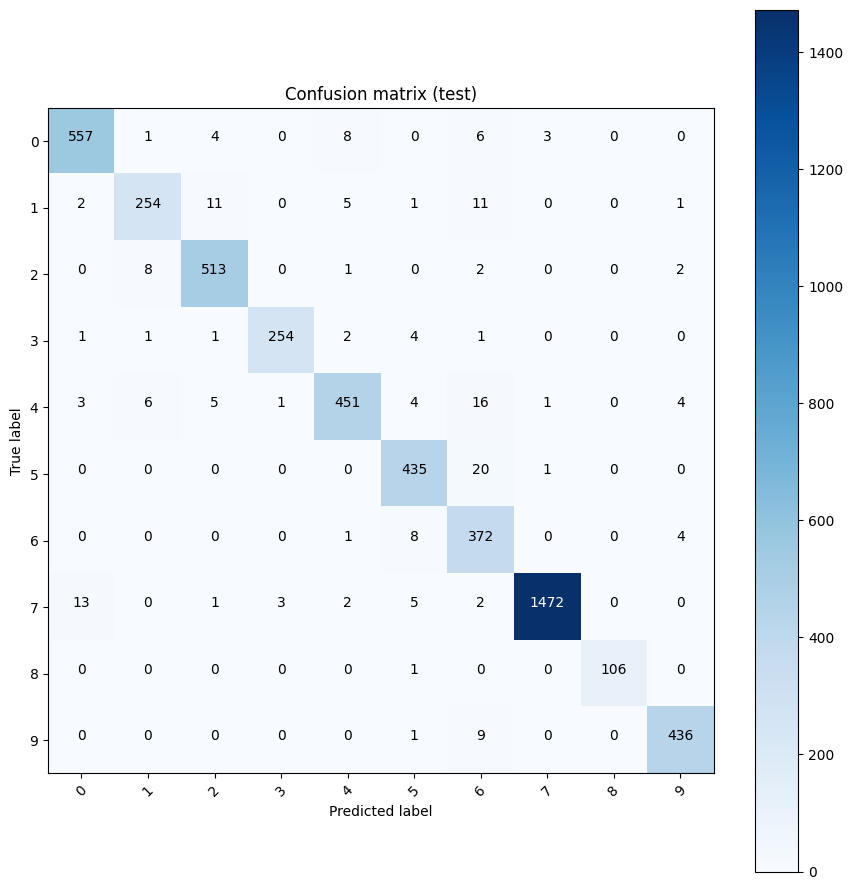

In [38]:
# ===== Phase-2: Fine-tune top layers (unfreeze) + evaluate =====
import time
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from pathlib import Path

# Settings
FINETUNE_EPOCHS = 8           # small number; change if you want longer
UNFREEZE_TOP_N_LAYERS = 50    # unfreeze last N layers of model (tweakable)
FT_LR = 1e-5                  # low LR for fine-tuning

print("Model summary before fine-tune (trainable counts):")
trainable = sum([1 for l in model.layers if l.trainable])
print(f" - currently trainable layers: {trainable} / {len(model.layers)}")

# 1) Unfreeze last N layers
for layer in model.layers[-UNFREEZE_TOP_N_LAYERS:]:
    layer.trainable = True

# (optionally) keep BatchNorm layers non-trainable for stability:
for layer in model.layers:
    if isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = False

print("After unfreeze: trainable layers count:", sum([1 for l in model.layers if l.trainable]))

# 2) Recompile with a smaller learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=FT_LR),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name="accuracy")]
)

# 3) Fine-tune
start = time.time()
history_ft = model.fit(
    aug_train_ds,          # augmented train dataset (on-the-fly)
    validation_data=val_ds,
    epochs=FINETUNE_EPOCHS,
    callbacks=callbacks,   # reuse existing callbacks (checkpoint, earlystop, reduceLR)
    class_weight=class_weights
)
print("Fine-tune time:", round(time.time()-start, 1), "s")

# 4) Save final model (optional)
Path("models").mkdir(parents=True, exist_ok=True)
model.save("models/effnetb0_finetuned.h5")
print("Saved finetuned model -> models/effnetb0_finetuned.h5")

# 5) Evaluate on test set
print("\nEvaluating on test set...")
results = model.evaluate(test_ds)
for name, val in zip(model.metrics_names, results):
    print(f"{name}: {val:.4f}")

# 6) Confusion matrix + classification report
# collect true labels and preds
y_true = []
y_pred = []
for x_batch, y_batch in test_ds:
    preds = model.predict(x_batch, verbose=0)
    preds = np.argmax(preds, axis=1)
    y_true.append(y_batch.numpy())
    y_pred.append(preds)

y_true = np.concatenate(y_true, axis=0)
y_pred = np.concatenate(y_pred, axis=0)

cm = confusion_matrix(y_true, y_pred)
print("\nClassification report:")
print(classification_report(y_true, y_pred, digits=4))

# plot confusion matrix
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion matrix (test)")
plt.colorbar()
n_classes = cm.shape[0]
tick_marks = np.arange(n_classes)
plt.xticks(tick_marks, tick_marks, rotation=45)
plt.yticks(tick_marks, tick_marks)
plt.ylabel('True label')
plt.xlabel('Predicted label')

# annotate
thresh = cm.max() / 2.
for i in range(n_classes):
    for j in range(n_classes):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()


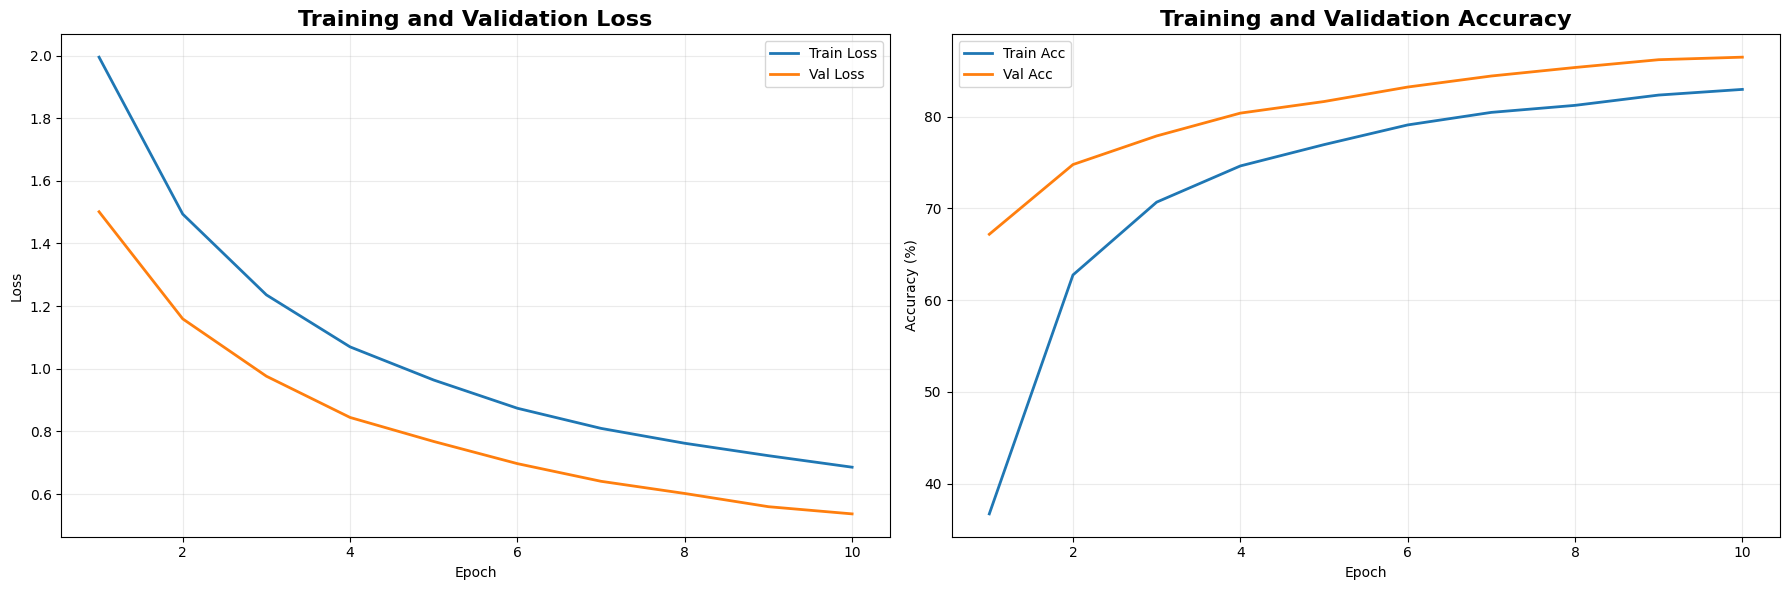

Saved plot to: training_curves.png


In [39]:
# Plot training curves (loss + accuracy)
import matplotlib.pyplot as plt
import numpy as np

# --- check history exists ---
try:
    hist = history.history   # history from model.fit(...)
except Exception as e:
    raise RuntimeError("No `history` object found. Make sure you ran `history = model.fit(...)` before this cell.") from e

# --- pick keys (supports sparse_categorical_accuracy naming) ---
acc_key = None
val_acc_key = None
for k in hist.keys():
    if "accuracy" in k and not k.startswith("val_"):
        acc_key = k
    if k.startswith("val_") and "accuracy" in k:
        val_acc_key = k

loss_key = None
val_loss_key = None
for k in hist.keys():
    if k == "loss":
        loss_key = "loss"
    if k == "val_loss":
        val_loss_key = "val_loss"

# fallback checks
if acc_key is None:
    # try exact common name
    acc_key = "sparse_categorical_accuracy" if "sparse_categorical_accuracy" in hist else list(hist.keys())[0]
if val_acc_key is None:
    val_acc_key = "val_" + acc_key if ("val_" + acc_key) in hist else None

if loss_key is None or val_loss_key is None:
    # attempt to find something with 'loss' in name
    loss_key = loss_key or next((k for k in hist.keys() if "loss" in k and not k.startswith("val_")), None)
    val_loss_key = val_loss_key or next((k for k in hist.keys() if k.startswith("val_") and "loss" in k), None)

if None in (loss_key, val_loss_key, acc_key, val_acc_key):
    raise RuntimeError(f"Could not auto-detect metric keys in history. Found keys: {list(hist.keys())}")

# --- data arrays ---
epochs = np.arange(1, len(hist[loss_key]) + 1)
train_loss = np.array(hist[loss_key])
val_loss = np.array(hist[val_loss_key])
train_acc = np.array(hist[acc_key])
val_acc = np.array(hist[val_acc_key])

# --- plot ---
plt.style.use('default')
fig, axes = plt.subplots(1, 2, figsize=(18,6))

# Loss
axes[0].plot(epochs, train_loss, label="Train Loss", linewidth=2)
axes[0].plot(epochs, val_loss, label="Val Loss", linewidth=2)
axes[0].set_title("Training and Validation Loss", fontsize=16, weight='bold')
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Loss")
axes[0].legend()
axes[0].grid(alpha=0.25)

# Accuracy (as %)
axes[1].plot(epochs, train_acc * 100.0, label="Train Acc", linewidth=2)
axes[1].plot(epochs, val_acc * 100.0, label="Val Acc", linewidth=2)
axes[1].set_title("Training and Validation Accuracy", fontsize=16, weight='bold')
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Accuracy (%)")
axes[1].legend()
axes[1].grid(alpha=0.25)

plt.tight_layout()
plt.savefig("training_curves.png", dpi=150, bbox_inches='tight')
plt.show()

print("Saved plot to: training_curves.png")


Detected 10 classes: ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']
158/158 ━━━━━━━━━━━━━━━━━━━━ 17s 72ms/step

 AUC Scores:
 Tomato___Bacterial_spot: 0.9993
 Tomato___Early_blight: 0.9964
 Tomato___Late_blight: 0.9993
 Tomato___Leaf_Mold: 0.9998
 Tomato___Septoria_leaf_spot: 0.9987
 Tomato___Spider_mites Two-spotted_spider_mite: 0.9987
 Tomato___Target_Spot: 0.9977
 Tomato___Tomato_Yellow_Leaf_Curl_Virus: 0.9999
 Tomato___Tomato_mosaic_virus: 1.0000
 Tomato___healthy: 0.9997
 Average        : 0.9989


/tmp/ipykernel_48/3889230868.py:85: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


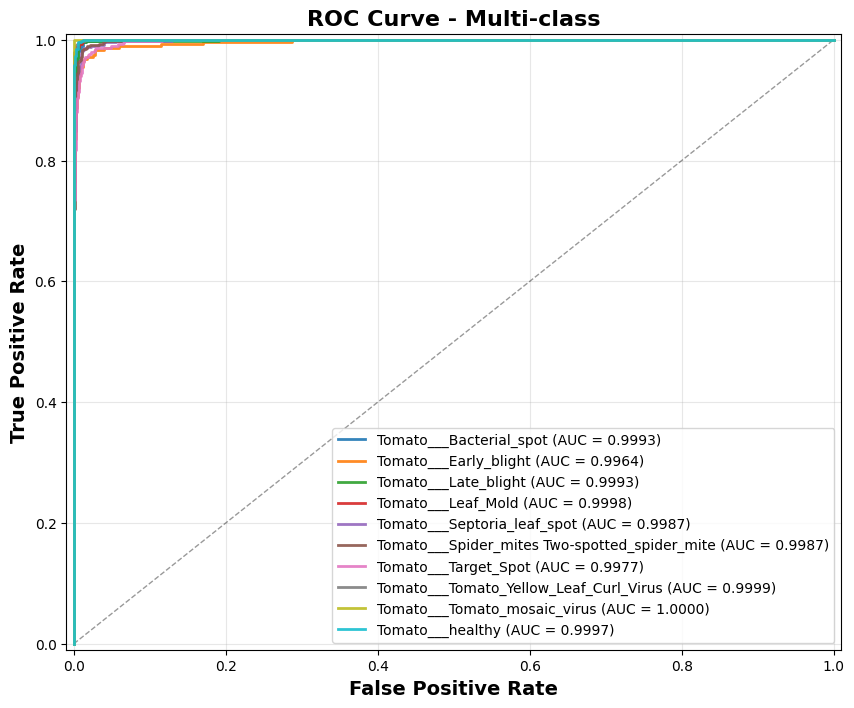


 ROC curve saved: /kaggle/working/roc_curve.png


In [40]:
# Cell: Multi-class ROC curves + AUC scores (save figure + print table)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import os
import tensorflow as tf

# --- try to get class names from environment ---
try:
    class_names = globals().get("class_names", None)
    if class_names is None:
        # many pipelines store class names on the dataset or train_raw
        if 'train_raw' in globals() and hasattr(train_raw, "class_names"):
            class_names = train_raw.class_names
        elif 'train_ds' in globals() and hasattr(train_ds, "class_names"):
            class_names = train_ds.class_names
        else:
            # fallback: infer from dataset labels (unique sorted)
            ytmp = np.concatenate([y.numpy() for x,y in test_ds], axis=0)
            uniq = np.unique(ytmp)
            class_names = [str(i) for i in uniq]
except Exception as e:
    print("Warning getting class_names:", e)
    class_names = None

# ensure class_names exists
if not class_names:
    # fallback: try to detect from labels in test_ds
    ytmp = np.concatenate([y.numpy() for x,y in test_ds], axis=0)
    uniq = np.unique(ytmp)
    class_names = [str(i) for i in uniq]

n_classes = len(class_names)
print(f"Detected {n_classes} classes: {class_names}")

# --- gather ground-truth labels from test_ds (no augmentation)
y_true = np.concatenate([y.numpy() for x,y in test_ds], axis=0)

# --- get model predicted probabilities (scores) ---
# Use model.predict on test_ds (should yield probs shape (N, n_classes))
y_score = model.predict(test_ds, verbose=1)
if y_score.ndim == 1:
    # binary case sometimes returns single prob -> convert to two-column
    y_score = np.vstack([1-y_score, y_score]).T

# --- binarize ground truth for multi-class ROC computation ---
y_true_b = label_binarize(y_true, classes=np.arange(n_classes))
if y_true_b.shape[1] != n_classes:
    # if mismatch (rare), expand to columns
    tmp = np.zeros((y_true_b.shape[0], n_classes), dtype=int)
    for i,lab in enumerate(y_true):
        tmp[i, int(lab)] = 1
    y_true_b = tmp

# --- compute per-class ROC and AUC ---
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    try:
        fpr[i], tpr[i], _ = roc_curve(y_true_b[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    except Exception as e:
        # fallback if something goes wrong
        fpr[i], tpr[i], roc_auc[i] = np.array([0,1]), np.array([0,1]), 0.0
        print(f"Warning computing ROC for class {i} ({class_names[i]}):", e)

# --- Average AUC (macro) ---
auc_values = [roc_auc[i] for i in range(n_classes)]
avg_auc = float(np.mean(auc_values))

# --- Print pretty AUC table ---
print("\n AUC Scores:")
print("="*60)
for i in range(n_classes):
    print(f" {class_names[i]:15s}: {roc_auc[i]:.4f}")
print("="*60)
print(f" Average        : {avg_auc:.4f}")
print("="*60)

# --- Plot multi-class ROC curves ---
plt.figure(figsize=(10,8))
plt.plot([0,1], [0,1], 'k--', lw=1, alpha=0.4)
colors = plt.cm.get_cmap('tab10', n_classes)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],
             label=f'{class_names[i]} (AUC = {roc_auc[i]:.4f})',
             lw=2, alpha=0.9, color=colors(i))

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
plt.title('ROC Curve - Multi-class', fontsize=16, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)

outpath = "/kaggle/working/roc_curve.png"
plt.savefig(outpath, dpi=200, bbox_inches='tight')
plt.show()

print(f"\n ROC curve saved: {outpath}")


batch dtype: <dtype: 'float32'>, min: 0.0000, max: 240.2756
Detected range ~[0, 255] (or >1). Using /255 -> [0,1].
After scaling: min=0.0000, max=0.9423
Saved to: sample_predictions_adaptive.png


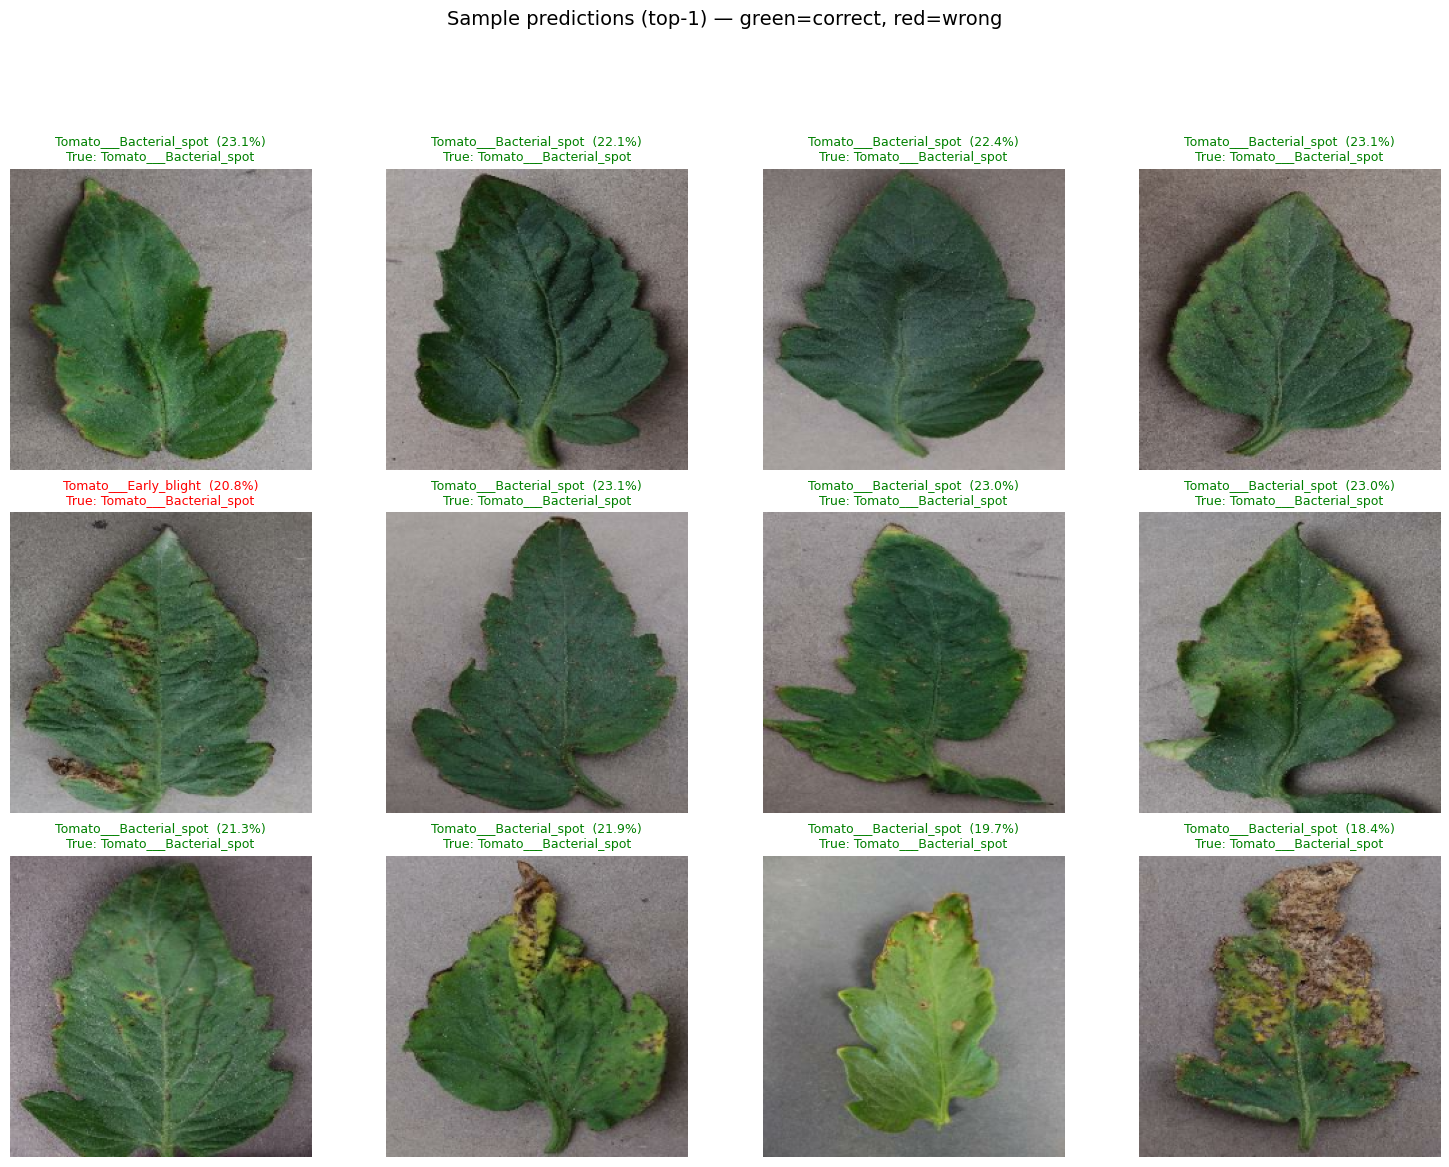

In [43]:
# ---------- Adaptive sample-predictions (robust) ----------
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

N_COL = 4
N_ROW = 3
SAVE_PATH = "sample_predictions_adaptive.png"

# get batch
batch = next(iter(test_ds))
images, labels = batch
images = images[:N_ROW*N_COL]
labels = labels[:N_ROW*N_COL]

# diagnostics: print dtype and global min/max
arr_min = float(tf.reduce_min(images).numpy())
arr_max = float(tf.reduce_max(images).numpy())
print(f"batch dtype: {images.dtype}, min: {arr_min:.4f}, max: {arr_max:.4f}")

# decide scaling strategy
if arr_min >= -1.1 and arr_max <= 1.1:
    print("Detected range ~[-1, 1]. Using (x+1)/2 -> [0,1].")
    images_disp = (images.numpy() + 1.0) / 2.0
elif arr_min >= 0.0 and arr_max > 1.1:
    print("Detected range ~[0, 255] (or >1). Using /255 -> [0,1].")
    images_disp = images.numpy() / 255.0
elif arr_min >= 0.0 and arr_max <= 1.1:
    print("Detected range ~[0,1]. Using as-is.")
    images_disp = images.numpy()
else:
    # fallback: min-max normalize per-batch (safe)
    print("Unusual range detected. Doing per-batch min-max normalization.")
    im_np = images.numpy()
    bmin = im_np.min()
    bmax = im_np.max()
    if bmax - bmin > 1e-6:
        images_disp = (im_np - bmin) / (bmax - bmin)
    else:
        images_disp = np.clip(im_np, 0.0, 1.0)

# final clip for safety
images_disp = np.clip(images_disp, 0.0, 1.0)
print(f"After scaling: min={images_disp.min():.4f}, max={images_disp.max():.4f}")

# predictions
pred_logits = model.predict(images, verbose=0)
pred_probs = tf.nn.softmax(pred_logits, axis=-1).numpy()
pred_idx = np.argmax(pred_probs, axis=1)
pred_conf = np.max(pred_probs, axis=1) * 100.0

# class names fallback
try:
    CLASS_NAMES = train_raw.class_names
except Exception:
    CLASS_NAMES = [
        'Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___Late_blight',
        'Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot',
        'Tomato___Spider_mites Two-spotted_spider_mite','Tomato___Target_Spot',
        'Tomato___Tomato_Yellow_Leaf_Curl_Virus','Tomato___Tomato_mosaic_virus',
        'Tomato___healthy'
    ]

# plot grid: image + text below (so text doesn't overlay image)
fig, axes = plt.subplots(N_ROW, N_COL, figsize=(N_COL*3.8, N_ROW*3.8))
axes = axes.flatten()

for i in range(len(images_disp)):
    ax = axes[i]
    ax.imshow(images_disp[i])
    ax.axis("off")
    true_label = CLASS_NAMES[int(labels[i].numpy())]
    pred_label = CLASS_NAMES[int(pred_idx[i])]
    conf = pred_conf[i]
    color = "green" if pred_label == true_label else "red"
    # put text as annotation below the image
    ax.set_title(f"{pred_label}  ({conf:.1f}%)\nTrue: {true_label}", fontsize=9, color=color)

# hide any extra axes
for j in range(len(images_disp), N_ROW*N_COL):
    axes[j].axis("off")

plt.tight_layout()
plt.suptitle("Sample predictions (top-1) — green=correct, red=wrong", fontsize=14, y=1.02)
plt.subplots_adjust(top=0.88)
fig.savefig(SAVE_PATH, bbox_inches="tight", dpi=150)
print("Saved to:", SAVE_PATH)
plt.show()
